In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

In [12]:
def read_data(data_list):
    web_path ='http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    all_data = []
    for i in data_list:
        all_data.append(web_path + i + ".txt")
    df_list = [pd.read_csv(file) for file in all_data]
    df = pd.concat(df_list)
    df.columns = df.columns.str.strip()
    return df

In [26]:
df_2022 = read_data(['220305', '220312', '220319', '220326',
                     '220402', '220409', '220416', '220423', '220430',
                     '220507', '220514', '220521', '220528', '220604'])

In [27]:
df_2022["TURNSTILE"] = df_2022["C/A"] + "-" + df_2022["UNIT"] + "-" + df_2022["SCP"]
df_2022.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00


In [28]:
df_2022.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00


In [29]:
df_2022.isnull().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
TURNSTILE    0
dtype: int64

In [30]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2951396 entries, 0 to 211608
Data columns (total 12 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   C/A        object
 1   UNIT       object
 2   SCP        object
 3   STATION    object
 4   LINENAME   object
 5   DIVISION   object
 6   DATE       object
 7   TIME       object
 8   DESC       object
 9   ENTRIES    int64 
 10  EXITS      int64 
 11  TURNSTILE  object
dtypes: int64(2), object(10)
memory usage: 292.7+ MB


In [31]:
# Check and handle the dublicates data.
(df_2022.groupby(['TURNSTILE', 'STATION', 'DATE', 'TIME'])['ENTRIES','EXITS']
 .count()
 .reset_index()
 .sort_values(['ENTRIES','EXITS'],ascending=False)).head()

C:\Users\volka\AppData\Local\Temp/ipykernel_6836/1110696864.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df_2022.groupby(['TURNSTILE', 'STATION', 'DATE', 'TIME'])['ENTRIES','EXITS']


,TURNSTILE,STATION,DATE,TIME,ENTRIES,EXITS
158533,A060-R001-00-00-05,WHITEHALL S-FRY,05/09/2022,05:00:00,2,2
773837,N063A-R011-00-00-00,42 ST-PORT AUTH,04/07/2022,12:00:00,2,2
774421,N063A-R011-00-00-01,42 ST-PORT AUTH,04/07/2022,12:00:00,2,2
2364942,R249-R179-01-05-01,86 ST,04/16/2022,00:00:00,2,2
2364943,R249-R179-01-05-01,86 ST,04/16/2022,04:00:00,2,2


In [33]:
df_2022 = df_2022.drop_duplicates(subset=['TURNSTILE','STATION','DATE','TIME'])
(df_2022.groupby(['TURNSTILE', 'STATION', 'DATE', 'TIME'])['ENTRIES','EXITS']
 .count()
 .reset_index()
 .sort_values(['ENTRIES','EXITS'],ascending=False)).head()

C:\Users\volka\AppData\Local\Temp/ipykernel_6836/1632144875.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df_2022.groupby(['TURNSTILE', 'STATION', 'DATE', 'TIME'])['ENTRIES','EXITS']


,TURNSTILE,STATION,DATE,TIME,ENTRIES,EXITS
0,A002-R051-02-00-00,59 ST,02/26/2022,03:00:00,1,1
1,A002-R051-02-00-00,59 ST,02/26/2022,07:00:00,1,1
2,A002-R051-02-00-00,59 ST,02/26/2022,11:00:00,1,1
3,A002-R051-02-00-00,59 ST,02/26/2022,15:00:00,1,1
4,A002-R051-02-00-00,59 ST,02/26/2022,19:00:00,1,1


In [35]:
df_2022['DATETIME'] = df_2022["DATE"]+ " " + df_2022["TIME"]
df_2022['DATETIME'] = pd.to_datetime(df_2022['DATETIME'], format='%m/%d/%Y %H:%M:%S')
df_2022.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,A002-R051-02-00-00,2022-02-26 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00


In [36]:
df=df_2022.sort_values(["TURNSTILE","DATETIME"])
df.reset_index(drop=True)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,A002-R051-02-00-00,2022-02-26 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433,TRAM2-R469-00-05-01,2022-06-03 05:00:00
2951335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433,TRAM2-R469-00-05-01,2022-06-03 09:00:00
2951336,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433,TRAM2-R469-00-05-01,2022-06-03 13:00:00
2951337,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,17:00:00,REGULAR,0,435,TRAM2-R469-00-05-01,2022-06-03 17:00:00


In [38]:
group=df.groupby(["TURNSTILE"])
df["ENTRIES_COUNT"]=group["ENTRIES"].transform(pd.Series.diff)
df["EXIT_COUNT"]=group["EXITS"].transform(pd.Series.diff)
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,A002-R051-02-00-00,2022-02-26 03:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00,4.0,21.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00,17.0,102.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00,33.0,85.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00,67.0,65.0


In [39]:
df.fillna(0,inplace=True)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,A002-R051-02-00-00,2022-02-26 03:00:00,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00,4.0,21.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00,17.0,102.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00,33.0,85.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00,67.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433,TRAM2-R469-00-05-01,2022-06-03 05:00:00,0.0,0.0
211605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433,TRAM2-R469-00-05-01,2022-06-03 09:00:00,0.0,0.0
211606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433,TRAM2-R469-00-05-01,2022-06-03 13:00:00,0.0,0.0
211607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,17:00:00,REGULAR,0,435,TRAM2-R469-00-05-01,2022-06-03 17:00:00,0.0,2.0


In [40]:
df_2022_positive = df[(df['ENTRIES_COUNT']>0) & (df['EXIT_COUNT']>0)]
df_2022_positive.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00,4.0,21.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00,17.0,102.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00,33.0,85.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00,67.0,65.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,23:00:00,REGULAR,7689890,2671568,A002-R051-02-00-00,2022-02-26 23:00:00,32.0,38.0


In [41]:
df_2022_positive['ENTRIES_COUNT'][df_2022_positive['ENTRIES_COUNT'] >= 4800] = 0 
df_2022_positive['EXIT_COUNT'][df_2022_positive['EXIT_COUNT'] >= 4800] = 0

C:\Users\volka\AppData\Local\Temp/ipykernel_6836/3614368470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_positive['ENTRIES_COUNT'][df_2022_positive['ENTRIES_COUNT'] >= 4800] = 0
C:\Users\volka\AppData\Local\Temp/ipykernel_6836/3614368470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_positive['ENTRIES_COUNT'][df_2022_positive['ENTRIES_COUNT'] >= 4800] = 0
C:\Users\volka\AppData\Local\Temp/ipykernel_6836/3614368470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [42]:
indexzero = df_2022_positive[(df_2022_positive.ENTRIES_COUNT == 0) | (df_2022_positive.EXIT_COUNT == 0)].index
df_2022_positive.drop(indexzero , inplace=True)

C:\Users\volka\AppData\Local\Temp/ipykernel_6836/836233213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_positive.drop(indexzero , inplace=True)


In [44]:
df_2022_positive.describe()

,ENTRIES,EXITS,ENTRIES_COUNT,EXIT_COUNT
count,2.349538e+06,2.349538e+06,2.349538e+06,2.349538e+06
mean,2.954170e+07,2.308805e+07,8.588511e+01,1.099876e+02
std,1.728239e+08,1.495275e+08,1.070550e+02,1.504695e+02
min,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
25%,3.929762e+05,2.816638e+05,1.400000e+01,1.900000e+01
50%,1.935648e+06,1.283978e+06,4.700000e+01,5.600000e+01
75%,6.533797e+06,4.554449e+06,1.170000e+02,1.400000e+02
max,2.116209e+09,2.039322e+09,4.498000e+03,4.428000e+03


In [45]:
df_2022_ten_busiest_stations = (df_2022_positive.groupby(['STATION'])['ENTRIES_COUNT', 'EXIT_COUNT'].sum().reset_index().sort_values(['ENTRIES_COUNT', 'EXIT_COUNT'], ascending=False)).head(10)
df_2022_ten_busiest_stations

C:\Users\volka\AppData\Local\Temp/ipykernel_6836/3608809464.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2022_ten_busiest_stations = (df_2022_positive.groupby(['STATION'])['ENTRIES_COUNT', 'EXIT_COUNT'].sum().reset_index().sort_values(['ENTRIES_COUNT', 'EXIT_COUNT'], ascending=False)).head(10)


,STATION,ENTRIES_COUNT,EXIT_COUNT
61,34 ST-PENN STA,4834049.0,7544396.0
233,GRD CNTRL-42 ST,3784257.0,6195392.0
59,34 ST-HERALD SQ,3521406.0,5602150.0
46,23 ST,3349059.0,4543960.0
110,86 ST,3230290.0,4833376.0
14,14 ST-UNION SQ,3008393.0,5128139.0
68,42 ST-PORT AUTH,2983846.0,4312477.0
353,TIMES SQ-42 ST,2955755.0,4804733.0
9,125 ST,2854233.0,4006223.0
226,FULTON ST,2737735.0,4178909.0


In [46]:
df_2022_ten_busiest_stations = (df_2022_positive.groupby(['STATION'])['ENTRIES_COUNT', 'EXIT_COUNT'].sum().reset_index().sort_values(['ENTRIES_COUNT', 'EXIT_COUNT'], ascending=False)).head(10)
df_2022_ten_busiest_stations

C:\Users\volka\AppData\Local\Temp/ipykernel_6836/3608809464.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2022_ten_busiest_stations = (df_2022_positive.groupby(['STATION'])['ENTRIES_COUNT', 'EXIT_COUNT'].sum().reset_index().sort_values(['ENTRIES_COUNT', 'EXIT_COUNT'], ascending=False)).head(10)


,STATION,ENTRIES_COUNT,EXIT_COUNT
61,34 ST-PENN STA,4834049.0,7544396.0
233,GRD CNTRL-42 ST,3784257.0,6195392.0
59,34 ST-HERALD SQ,3521406.0,5602150.0
46,23 ST,3349059.0,4543960.0
110,86 ST,3230290.0,4833376.0
14,14 ST-UNION SQ,3008393.0,5128139.0
68,42 ST-PORT AUTH,2983846.0,4312477.0
353,TIMES SQ-42 ST,2955755.0,4804733.0
9,125 ST,2854233.0,4006223.0
226,FULTON ST,2737735.0,4178909.0


In [47]:
df_2022_ten_busiest_stations['TOTAL_PEOPLE'] = df_2022_ten_busiest_stations.ENTRIES_COUNT + df_2022_ten_busiest_stations.EXIT_COUNT
df_2022_ten_busiest_stations

,STATION,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE
61,34 ST-PENN STA,4834049.0,7544396.0,12378445.0
233,GRD CNTRL-42 ST,3784257.0,6195392.0,9979649.0
59,34 ST-HERALD SQ,3521406.0,5602150.0,9123556.0
46,23 ST,3349059.0,4543960.0,7893019.0
110,86 ST,3230290.0,4833376.0,8063666.0
14,14 ST-UNION SQ,3008393.0,5128139.0,8136532.0
68,42 ST-PORT AUTH,2983846.0,4312477.0,7296323.0
353,TIMES SQ-42 ST,2955755.0,4804733.0,7760488.0
9,125 ST,2854233.0,4006223.0,6860456.0
226,FULTON ST,2737735.0,4178909.0,6916644.0


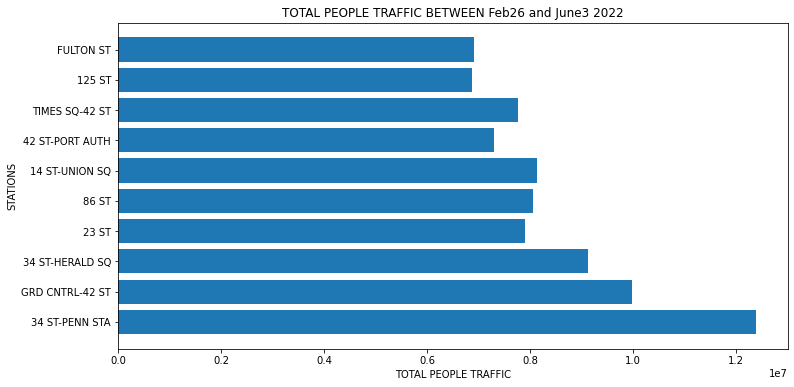

In [48]:
plt.figure(figsize = [12,6])
stations = df_2022_ten_busiest_stations.STATION
total_people = df_2022_ten_busiest_stations.TOTAL_PEOPLE
plt.barh(stations, total_people, align='center')
plt.xlabel('TOTAL PEOPLE TRAFFIC')
plt.ylabel('STATIONS')
plt.title('TOTAL PEOPLE TRAFFIC BETWEEN Feb26 and June3 2022')
plt.show()

In [53]:
station_list = [i for i in df_2022_ten_busiest_stations['STATION']]
top_ten_stations=df_2022_positive[df_2022_positive["STATION"].isin(station_list)]
top_ten_stations["NAMEOFDAY"]= top_ten_stations["DATETIME"].dt.day_name()
top_ten_stations.head()

C:\Users\volka\AppData\Local\Temp/ipykernel_6836/621525824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ten_stations["NAMEOFDAY"]= top_ten_stations["DATETIME"].dt.day_name()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,ENTRIES_COUNT,EXIT_COUNT,NAMEOFDAY
3003,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,02/26/2022,07:00:00,REGULAR,10274908,13100825,A021-R032-01-00-00,2022-02-26 07:00:00,15.0,43.0,Saturday
3004,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,02/26/2022,11:00:00,REGULAR,10274980,13101182,A021-R032-01-00-00,2022-02-26 11:00:00,72.0,357.0,Saturday
3005,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,02/26/2022,15:00:00,REGULAR,10275091,13101724,A021-R032-01-00-00,2022-02-26 15:00:00,111.0,542.0,Saturday
3006,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,02/26/2022,19:00:00,REGULAR,10275296,13102262,A021-R032-01-00-00,2022-02-26 19:00:00,205.0,538.0,Saturday
3007,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,02/26/2022,23:00:00,REGULAR,10275430,13102505,A021-R032-01-00-00,2022-02-26 23:00:00,134.0,243.0,Saturday


In [54]:
top_ten_stations_weekdays = (top_ten_stations.groupby(['STATION','NAMEOFDAY']).sum().reset_index())
top_ten_stations_weekdays['TOTAL_PEOPLE'] = top_ten_stations_weekdays.ENTRIES_COUNT + top_ten_stations_weekdays.EXIT_COUNT
top_ten_stations_weekdays.head(8)

,STATION,NAMEOFDAY,ENTRIES,EXITS,ENTRIES_COUNT,EXIT_COUNT,TOTAL_PEOPLE
0,125 ST,Friday,585373597769,543266188826,468013.0,642162.0,1110175.0
1,125 ST,Monday,601753906242,557987815901,432509.0,589704.0,1022213.0
2,125 ST,Saturday,586495110590,542923151721,276992.0,444150.0,721142.0
3,125 ST,Sunday,591335644995,547476012095,234454.0,385838.0,620292.0
4,125 ST,Thursday,591787439959,548547292677,480296.0,647062.0,1127358.0
5,125 ST,Tuesday,592786305956,549065244414,478392.0,640791.0,1119183.0
6,125 ST,Wednesday,590974970245,547738821031,483577.0,656516.0,1140093.0
7,14 ST-UNION SQ,Friday,21288415698,15851400434,489365.0,816090.0,1305455.0


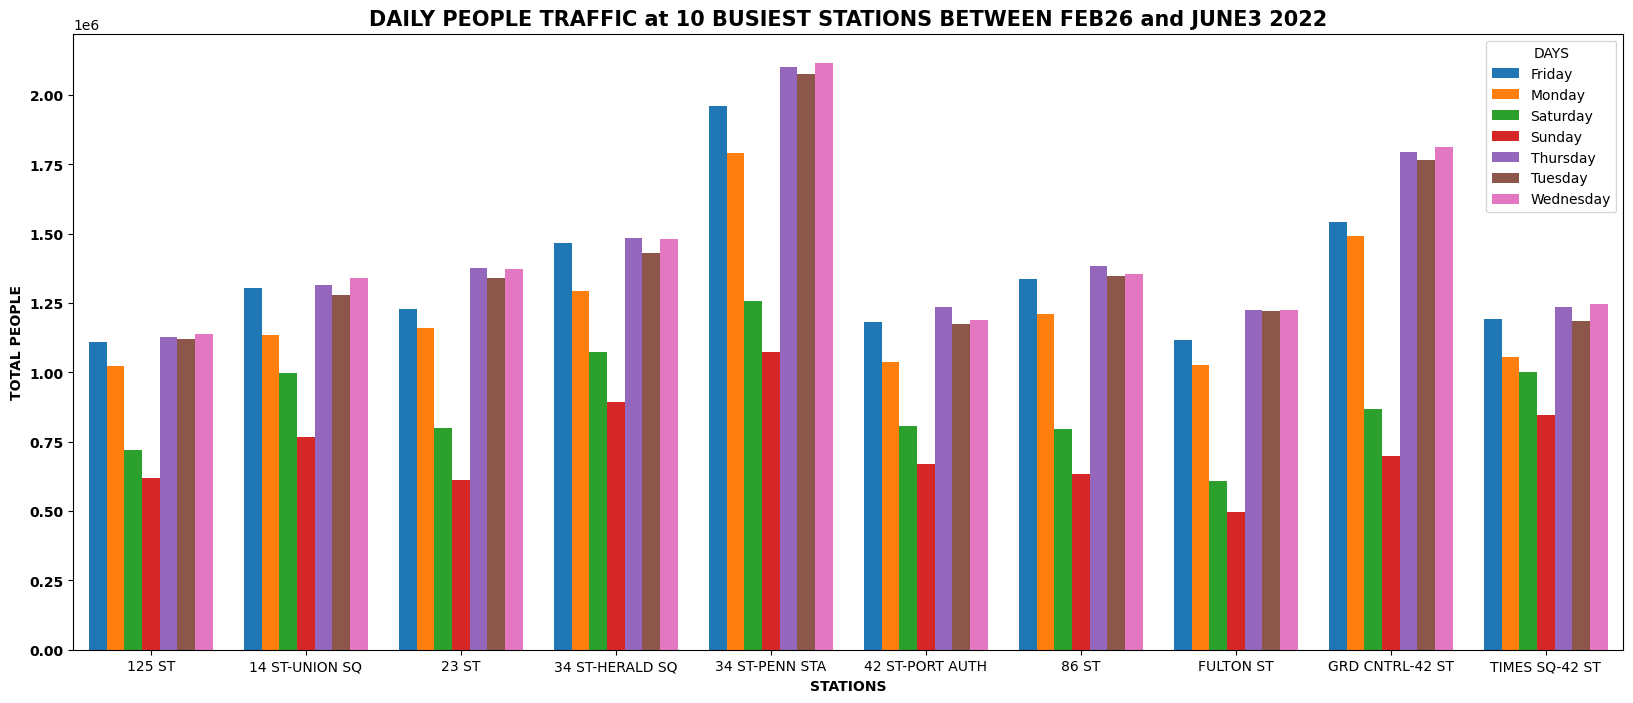

In [55]:
plt.figure(figsize=(20,8),dpi=100),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TOTAL_PEOPLE", hue="NAMEOFDAY",data=top_ten_stations_weekdays, saturation=1)
plt.title("DAILY PEOPLE TRAFFIC at 10 BUSIEST STATIONS BETWEEN FEB26 and JUNE3 2022", weight="bold", fontsize=15)
plt.xlabel("STATIONS",weight="bold")
plt.xticks(rotation=0)
plt.ylabel("TOTAL PEOPLE",weight= "bold")
plt.yticks(weight="bold")
plt.legend(title="DAYS")
plt.show()